In [23]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


C:\Users\rr00547872\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 31s 3us/step


In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 364s 6ms/step - loss: 0.2606 - acc: 0.9206 - val_loss: 0.0594 - val_acc: 0.9806
Epoch 2/12
60000/60000 [==============================] - 343s 6ms/step - loss: 0.0933 - acc: 0.9719 - val_loss: 0.0405 - val_acc: 0.9871
Epoch 3/12
60000/60000 [==============================] - 339s 6ms/step - loss: 0.0671 - acc: 0.9794 - val_loss: 0.0382 - val_acc: 0.9870
Epoch 4/12
60000/60000 [==============================] - 318s 5ms/step - loss: 0.0548 - acc: 0.9831 - val_loss: 0.0335 - val_acc: 0.9886
Epoch 5/12
60000/60000 [==============================] - 323s 5ms/step - loss: 0.0478 - acc: 0.9858 - val_loss: 0.0354 - val_acc: 0.9880
Epoch 6/12
60000/60000 [==============================] - 344s 6ms/step - loss: 0.0427 - acc: 0.9870 - val_loss: 0.0297 - val_acc: 0.9908
Epoch 7/12
60000/60000 [==============================] - 330s 5ms/step - loss: 0.0385 - acc: 0.9885 - val_loss: 0.0281 - 

In [6]:
#model.save('model.h5')

In [24]:
from keras.models import load_model

model = load_model('model.h5')
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [25]:
from keras.preprocessing import image
import numpy as np
from skimage import io
from PIL import Image,ImageFilter
import cv2

image_pil = (Image.open('videoblocks-black-and-white-random-zero-one-digits_h-ggaripre_thumbnail-full01.png').convert('L'))
image_read= (np.array(image_pil,'float'))
im_read=cv2.resize(image_read,(28,28))
print(im_read.shape)
img = im_read.reshape([1, 28, 28, 1])

result = model.predict(img)  
print(np.argmax(result))

(28, 28)
0


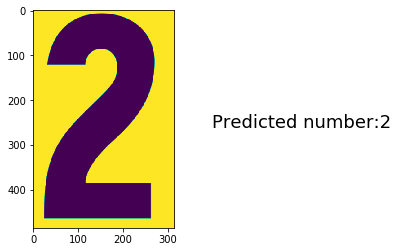

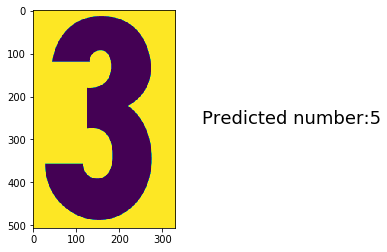

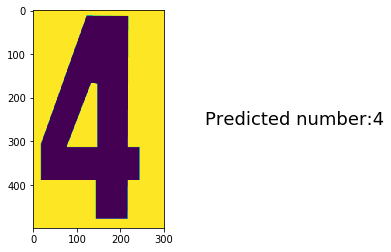

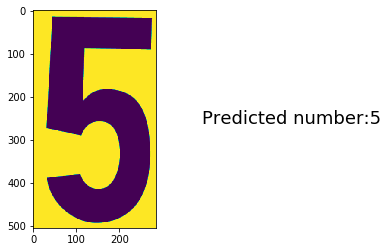

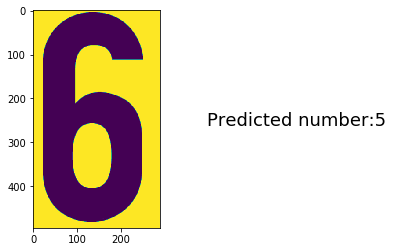

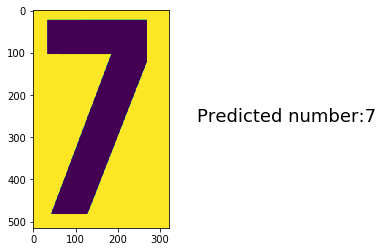

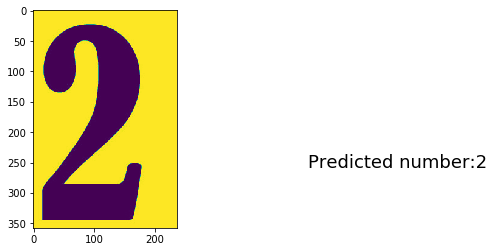

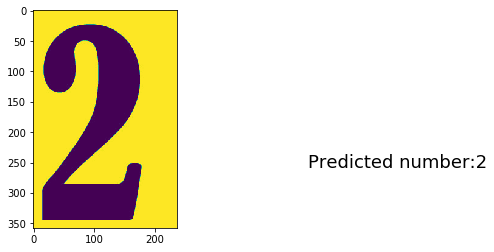

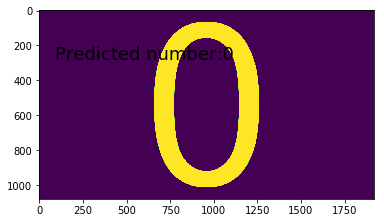

In [60]:
import os
import cv2
import numpy as np
from PIL import Image,ImageFilter
from matplotlib import pyplot as plt

path = ".\images_for_test" 
image_paths = [os.path.join(path, f) for f in os.listdir(path)]

for path in image_paths:
    plt.figure()
    image_pil = Image.open(path).convert('L')
    # Convert the image format into numpy array
    image = np.array(image_pil, 'float')
   
    image_read= (np.array(image_pil,'float'))
    im_read=cv2.resize(image_read,(28,28))
    img = im_read.reshape([1, 28, 28, 1])

    result = model.predict(img)  
    ans=np.argmax(result)
    plt.text(600, 250,"Predicted number:"+str(ans),horizontalalignment='center',verticalalignment='center',fontsize=18)
    plt.imshow(image)
